# 1. Bias (_độ chệch_) và variance (_độ biến động_)

Năng lực của những mô hình phân loại và dự báo trong học có giám sát của machine learning thường được thể hiện qua hai khía cạnh bias và variance. Hiểu được chính xác ý nghĩa của hai khái niệm này chúng ta sẽ biết cách tạo ra những mô hình chính xác và phòng tránh các hiện tượng overfitting (mô hình _quá khớp_) và underfitting (mô hình _khớp kém_).

Vậy thì bias và variance trong machine learning có nghĩa là gì?

**Bias** có nghĩa là **độ chệch** giữa giá trị dự báo của một mô hình machine learning so với ground truth. Độ chệch lớn thì dẫn tới các dự báo của mô hình bị sai lệch. Thông thường những mô hình **quá đơn giản** được huấn luyện trên những bộ dữ liệu có kích thước lớn sẽ không học được các biểu diễn dữ liệu một cách đủ phức tạp nên thường xảy ra hiện tượng bị chệch. Vì vậy trong tình huống này chúng ta thường sử dụng mô hình **phức tạp hơn** để tận dụng khả năng biểu diễn tốt của chúng trên những tập dữ liệu kích thước lớn. Tuy nhiên một mô hình quá phức tạp cũng có khả năng xảy ra hiện tượng variance.

**Variance** là hiện tượng mô hình của bạn dự báo **thiếu ổn định** thể hiện qua ra giá trị dự báo **dao động** xung quanh giá trị ground truth. Những lớp mô hình phức tạp được huấn luyện trên tập huấn luyện nhỏ thường xảy ra hiện tượng variance và dẫn tới việc học giả mạo thông qua bắt chước dữ liệu hơn là học qui luật tổng quát. Vì vậy đối với dữ liệu mà chúng chưa được học như trên tập kiểm tra thì không được biểu diễn chính xác trong khi tập huấn luyện thì khớp tốt.

Giữa bias và variance có một sự đánh đổi qua lại trong quá trình chúng ta xây dựng và huấn luyện mô hình machine learning. Để hình dung rõ hơn về sự đánh đổi này chúng ta cùng lấy ví dụ như bên dưới.


## 1.2. Sự đánh đổi giữa độ chệch và độ biến động

Gỉa sử chúng ta có một tập dữ liệu huấn luyện gồm $n$ điểm $D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n) \}$ và một hàm huấn luyện được ước lượng từ tập huấn luyện là $\hat{f}(x; D)$ (Ký hiệu $\hat{f}(x; D)$ để thể hiện rằng hàm này được hồi qui dựa vào tập dữ liệu huấn luyện $D$). Kỳ vọng của chúng ta là hàm $\hat{f}(x; D)$ sẽ gần xấp xỉ hàm thực tế là $f(x)$ biểu diễn mối quan hệ **thực** giữa $x$ và $y$. Đồng thời với mọi hàm số $f(x)$ thì chúng ta luôn chấp nhận một phần sai số không thể giảm bớt được (_irreducible error_) so với giá trị thực tế $y$. Sai số này được xem như thành phần nhiễu của mô hình, có giá trị rất nhỏ mà trên thực tế bất kỳ mô hình dự báo nào cũng sẽ tồn tại. Chúng ta ký hiệu thành phần sai số này là $\epsilon$ có kỳ vọng bằng 0 và phương sai $\sigma_{\epsilon}^2$.

Tổng bình phương sai số giữa giá trị dự báo $\hat{f}(x; D)$ và giá trị thực tế $y$ được biểu diễn qua tổng của bias và variance như sau:

$$\mathbf{E}{[(y-\hat{f}(x; D))^2]} = \underbrace{\mathbf{E}[(\hat{f}(x; D)-f(x))^2]}_{\text{bias error}}+ \underbrace{\mathbf{E}[(\hat{f}(x; D)-\mathbf{E}(\hat{f}(x; D)))^2]}_{\text{variance error}} + \underbrace{\sigma^2_{\epsilon}}_{\text{irreduciable error}} \tag{1}$$

Thật vậy, để chứng minh công thức $(1)$ chúng ta dựa trên hằng đẳng thức:

$$(a+b+c)^2 = a^2+b^2+c^2+2ab+2bc+2ac$$

Bên dưới là cách chứng minh đẳng thức $(1)$ dành cho bạn nào muốn hiểu sâu:

$$\begin{eqnarray}
\mathbf{E}[(y-\hat{f}(x; D))^2] & = & \mathbf{E}[(f(x)+\epsilon - \hat{f}(x; D))^2] \\
& = & \mathbf{E}[(~\underbrace{f(x)-\mathbf{E}[{\hat{f}(x; D)}]}_{a}+ \underbrace{\mathbf{E}[{\hat{f}(x; D)}]- \hat{f}(x; D)}_{b}+\underbrace{\epsilon}_{c}~)^2] \\
& = & \mathbf{E}[(f(x)-\mathbf{E}[\hat{f}(x; D)])^2 + (\hat{f}(x; D)-\mathbf{E}[\hat{f}(x; D)])^2 + \epsilon^2 + \\ 
& ~ & 2\epsilon(f(x)-\mathbf{E}[\hat{f}(x; D)])+2(f(x)+\epsilon-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))] \\
& = & \mathbf{E}[(f(x)-\mathbf{E}[\hat{f}(x; D)])^2] + \mathbf{E}[(\hat{f}(x; D)-\mathbf{E}[\hat{f}(x; D)])^2] + \mathbf{E}(\epsilon^2) + \\
& ~ & \underbrace{\mathbf{E}[2\epsilon(f(x)-\mathbf{E}[\hat{f}(x; D)])]}_{0}+\underbrace{\mathbf{E}[2(y-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))]}_{0} \\
& = & \underbrace{\mathbf{E}[(f(x)-\mathbf{E}[\hat{f}(x; D)])^2]}_{\text{bias error}} + \underbrace{\mathbf{E}[(\hat{f}(x; D)-\mathbf{E}[\hat{f}(x; D)])^2]}_{\text{variance error}} + \sigma_{\epsilon}^2
\end{eqnarray}$$

Mặt khác do $\epsilon$ được coi như nhiễu và nên độc lập với $f(x)$ và $\hat{f}(x; D)$ nên áp dụng công thức kỳ vọng tích bằng tích các kỳ vọng đối với các biến độc lập: $\mathbf{E}[2\epsilon(f(x)-\mathbf{E}[\hat{f}(x; D))]]=2\mathbf{E}(\epsilon)\mathbf{E}[f(x)-\mathbf{E}(\hat{f}(x; D))] = 0$. Ngoài ra:

$$\begin{eqnarray}\mathbf{E}[2(y-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))] & = & \mathbf{E}_{x, y, D}[2(y-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))] \\
& = & \mathbf{E}_{x, y}[2(y-\mathbf{E}[\hat{f}(x; D)])\underbrace{\mathbf{E}_{D}[\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D)]}_{0} = 0\end{eqnarray}$$

Từ đó ta dễ dàng suy ra được công thức $(1)$ là đúng.

Công thức $(1)$ còn được gọi là công thức **phân rã bias-variance** (_bias-variance decomposition_). Thành phần phương sai nhiễu $\sigma_{\epsilon}$ có độ lớn không đáng kể nên ta có thể xem như tổng bình phương sai số chỉ phục thuộc phần lớn vào bias và variance. Sự đánh đổi giữa bias và variance thể hiện qua: `đối với các lớp mô hình có cùng tổng bình phương sai số mà chúng ta muốn một mô hình dự báo ít chệch hơn thì sẽ cần độ biến động lớn hơn và ngược lại`.

Kết quả của một mô hình machine learning có thể rơi vào một trong bốn trường hợp giữa bias và variance như hình bên dưới.


![](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

**Hình 1:** Các khả năng về bias và variance của mô hình. Giả sử các điểm màu xanh là phân phối của giá trị dự báo và vòng tròng màu đỏ ở giữa thể hiện tâm của phân phối ground truth. Như vậy các mô hình có thể rơi vào:

* Low Bias, Low Variance: Đây là trường hợp mô hình khớp tốt vì phân phối của giá trị dự báo trùng với phân phối của ground truth.

* Low Bias, High Variance: Đây là trường hợp mô hình có có độ chệch thấp nhưng biến động cao. Các giá trị dự báo sẽ giao động qua lại xung quanh ground truth. Thông thường trường hợp này sẽ xảy ra hiện tượng overfitting mà chúng ta sẽ tìm hiểu sau.

* High Bias, Low Variance: Đây là trường hợp mô hình dự báo bị chệch, phân phối của giá trị dự báo nằm khác xa so với phân phối của ground truth. Đồng thời lớp mô hình là đơn giản thể hiện qua giá trị dự báo ít giao động. Các mô hình có đặc điểm này thường bị underfitting.

* High Bias, High Variance: Trường hợp này là một mô hình kém thể hiện qua mô hình vừa bị chệch và vừa giao động. Các mô hình có đặc điểm này thường bị underfitting.

Bias và variance là những nguyên nhân trực tiếp dẫn tới hai hiện tượng overfitting và underfitting. Khi đó mô hình sẽ không thể sử dụng trong thực tế vì tính kém chính xác của chúng khi dự báo trên những tập dữ liệu mới, chúng ta sẽ phải tìm cách khắc phục chúng. Vậy overfitting và underfitting là gì? Chúng ta sẽ tìm hiểu mục bên dưới.

# 2. Quá khớp (_Overfitting_) và vị khớp (_Underfitting_)



Quá khớp (_overfitting_) và vị khớp (_underfitting_) là những ảnh hưởng nghiêm trọng lên hiệu quả của mô hình khi áp dụng vào thực tế.

**Quá khớp**

Khi nói đến quá khớp là ta nói đến khả năng mô hình dự báo tốt trên tập huấn luyện nhưng không dự báo tốt trên tập kiểm tra. Nguyên nhân chính của hiện tượng này là do mô hình không khái quát hoá được dữ liệu. Do đó đối với các trường hợp mà nó chưa được học như trên tập kiểm tra thì sẽ không được dự báo tốt.

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

**Hình 1:** Ví dụ về overfitting (ngoài cùng bên phải), underfitting (đầu tiên) và vừa vặn (ở giữa). Đường biên phân chia của mô hình overfitting có xu hướng phân loại tốt mọi điểm nhưng đường cong này rất phức tạp (thể hiện qua _high variance_) và không khái quát về hình dạng như đường biên ở giữa. Đường biên của mô hình underfitting thì quá đơn giản (thể hiện qua _low variance_) và phân loại sai nhiều điểm dữ liệu. Trong khi đó đường biên phân chia ở giữa thể hiện được xu hướng phân chia tổng quát và khớp tốt dữ liệu huấn luyện lẫn kiểm tra (_low bias, low variance_).

**Vị khớp**

Vị khớp là hiện tượng mà mô hình dự báo kém cả trên tập huấn luyện và tập kiểm tra như hình ngoài cùng bên trái. Thông thường những mô hình quá đơn giản khi dự báo trên tập dữ liệu lớn thường dẫn tới hiện tượng vị khớp. Một mô hình vị khớp thì sẽ có độ chệch lớn (_high bias_) nên các dự báo sẽ không thể chính xác và dẫn tới không thể áp dụng được mô hình vào thực tế. Lúc này chúng ta cần có chiến lược cải tiến huấn luyện trên cả hai khía cạnh mô hình và dữ liệu để huấn luyện ra những mô hình mạnh hơn.

## 2.1. Nguyên nhân của quá khớp và vị khớp 

Nguyên nhân của **quá khớp** có thể xuất phát từ mô hình quá phức tạp hoặc dữ liệu chưa đủ khái quát. 

Những mô hình quá phức tạp thường có không gian biểu diễn lớn. Do đó nó có thể khớp được những hình dạng đường biên phân chia phức tạp.  Điều này tưởng như là tốt đối với việc dự báo và phân loại nhưng hoá ra là không tốt vì mô hình có xu hướng học chi tiết thay vì học qui luật tổng quát.

Hiện tượng **quá khớp** xuất phát từ dữ liệu cũng là hiện tượng khá phổ biến. Khi dữ liệu không đủ rộng và khái quát thì mô hình không thể dự báo tốt trên tập test là những dữ liệu mà nó chưa được học. Lấy ví dụ về tác vụ phân loại ảnh chó và mèo. Trong dữ liệu huấn luyện hầu hết các ảnh chụp các chú chó và mèo là các con vật thực tế nhưng trong dữ liệu kiểm tra lại tồn tại một số ảnh hoạt hình chó và mèo làm cho mô hình không dự báo đúng trên tập dữ liệu này.

Hiện tượng **vị khớp** cũng có thể xuất phát từ phía mô hình hoặc từ phía dữ liệu. Đối với những bộ dữ liệu lớn nhưng sử dụng mô hình quá nhỏ thì sẽ không đủ khả năng biểu diễn tốt dữ liệu. Chẳng hạn như hình ngoài cùng bên trái của hình 1 nếu chỉ sử dụng đường biên là một đường thẳng tuyến tính giản đơn thì không đủ sức mạnh để phân loại dữ liệu. Khi đó ta cần chuyển sang những lớp mô hình phức tạp hơn.

Dữ liệu không đủ đa dạng cũng là nguyên nhân dẫn tới hiện tượng **vị khớp**. Như trong ví dụ phân loại ảnh chó và mèo, để phân loại được ảnh chó và mèo hoạt hình thì chúng ta cần bổ sung thêm những dữ liệu mới mà mô hình chưa được học. Quá trình này cần phải được thực hiện định kỳ và liên tục.




## 2.2. Ví dụ về quá khớp và vị khớp

Mục đích của ví dụ này nhằm chỉ ra cách sấp xỉ các hàm phi tuyến bằng phương pháp hồi qui đa thức (_Linear regression with Polynormial feature_) và sự thay đổi độ phức tạp đa thức dẫn tới các hiện tượng overfitting và underfitting như thế nào. Cụ thể chúng ta sẽ chỉ ra rằng khi mức độ phức tạp của các phương trình đa thức càng gia tăng (tức bậc của đa thức càng cao) thì mô hình có xu hướng bị overfitting. Đồng thời một phương trình đa thức quá giản đơn (chẳng hạn bậc 1) sẽ không khớp dữ liệu tốt, khi đó chúng ta gặp hiện tượng underfitting.

Giả sử bộ dữ liệu của chúng ta có mối quan hệ giữa $\mathbf{x}$ và $y$ theo phương trình cosin như bên dưới:

$$y_i = \text{cos}(1.5\pi x_i) + \epsilon_i$$

$x_i$ nhận giá trị ngẫu nhiên và $\epsilon_i$ đại diện cho sai số ngẫu nhiên. Khi đó đồ thị biểu diễn $\mathbf{x}$ theo $y$ là một đường cong dạng hình sin.

Code mẫu này được tham khảo từ [Overfitting and Underfitting - Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).


(30,) (30,)


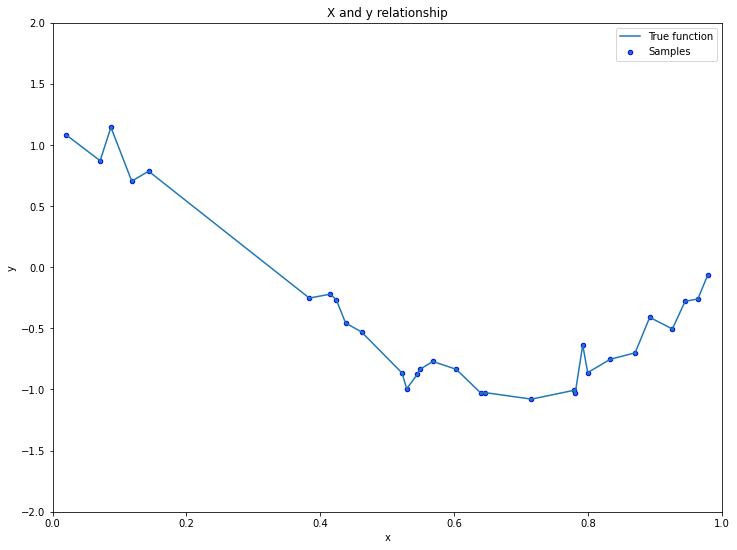

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_train_samples, n_test_samples = 30, 10

X_train = np.sort(np.random.rand(n_train_samples))
y_train = true_fun(X_train) + np.random.randn(n_train_samples) * 0.1

print(X_train.shape, y_train.shape)

def plot(X, y, figure=(12, 9)):
  plt.figure(figsize=figure)
  plt.plot(X, y, label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc='best')
  plt.title('X and y relationship')
  
plot(X_train, y_train)

Do đã thêm thành phần sai số $\epsilon_i$ nên mối quan hệ giữa $x$ và $y$ là không hoàn toàn theo phương trình cosin mà có nhiễu. 

Tiếp theo chúng ta sẽ tìm cách xấp xỉ mối quan hệ giữa $x$ và $y$ thông qua hồi qui đa thức với các bậc cao nhất là `1, 4, 15` và đánh giá cross validation theo metric MSE cho từng trường hợp. Bạn đọc có thể tham khảo lại [6.2. Đánh giá cheó (cross validation)¶
](https://phamdinhkhanh.github.io/deepai-book/ch_appendix/appendix_pipeline.html#danh-gia-cheo-cross-validation) để hiểu thế nào là cross validation. Khi kết quả MSE trên các tập validation của quá trình cross validation càng lớn thì chứng tỏ mô hình gặp hiện tượng overfitting càng nặng.

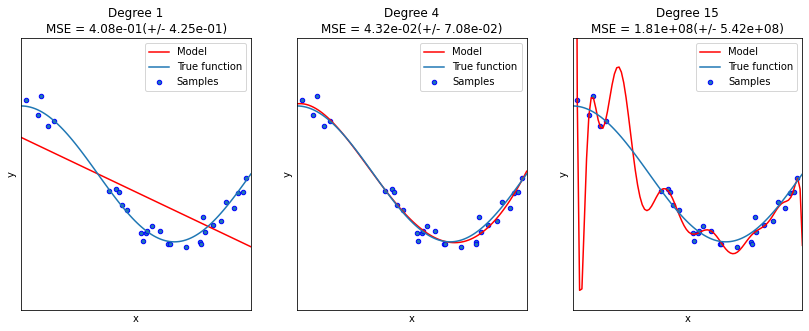

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Tạo các Featuer bậc degrees[i] cho mô hình.
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # Hồi qui tuyến tính
    linear_regression = LinearRegression()
    
    # Pipeline đơn giản cho mô hình từ feature engineering tới hồi qui tuyến tính
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    
    # Huấn luyện mô hình
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Đánh giá mô hình sử dụng cross validation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train,
                             scoring='neg_mean_squared_error', cv=10)

    # Dự báo trên tập huấn luyện
    X_test = np.linspace(0, 1, 100)
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])

    # Vẽ biểu đồ trên tập huấn luyện
    plt.plot(X_test, y_test_pred, color='r', label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Trong cả 3 mô hình trên thì bậc 15 có kết quả MSE cao nhất và đây cũng là mô hình bị overfitting nặng nhất. Đa thức bậc 15 thì có khả năng biểu diễn tốt hơn các bậc 1 và 4 nhưng quy luật mà nó học được không khái quát quy luật chung nên phương sai MSE validation cao nhất.

Đường thẳng huấn luyện bậc 1 lại thể hiện xu hướng bị chệch khỏi phương trình gốc. Chúng ta có thể thấy gía sự tín hiệu chệch qua sự khác biệt giữa đường thẳng và đường cong `true function`. Giá trị MSE validation của chúng thấp hơn bậc 15 nhưng do bị chệch nên vẫn còn cao.

Chỉ có đường cong tương ứng với bậc 4 là vừa khớp tốt qui luật tổng quát trên cả tập huấn luyện và kiểm tra. Điều này được thể hiện qua MSE validation là nhỏ nhất và hình dạng đường cong rất sát với `true function`. Phương trình bậc 4 sẽ là lựa chọn lý tưởng nhất khi lựa chọn mô hình.

## 2.3. Ảnh hưởng của quá khớp và vị khớp tới tác vụ dự báo

Một phương trình quá khớp và vị khớp đều không tốt cho tác vụ dự báo. Hiện tượng quá khớp làm cho mô hình không thể áp dụng được vào thực tế mặc dù kết quả thể hiện tốt trên tập huấn luyện. Hiện tượng vị khớp sẽ tạo ra một mô hình bị chệch trên cả tập huấn luyện và kiểm tra nên sẽ xảy ra lỗi khi dự báo. Cả hai hiện tượng quá khớp và vị khớp đều gây nguy hiểm cho mô hình và cần được khắc phục.

Phương pháp để khắc phục mô hình khi xảy ra quá khớp và vị khớp là biệt khác nhau. Vì vậy khi xây dựng mô hình chúng ta cần phải xác định hiện tượng mà mô hình đang mắc phải là quá khớp hay vị khớp, sau đó mới lựa chọn ra phương pháp điều chỉnh phù hợp. Trong mục tiếp theo là giới thiệu sơ bộ cách xác định quá khớp và vị khớp và chiến lược điều chỉnh mô hình để khắc phục những hiện tượng này.

## 2.4. Cách xác định quá khớp và vị khớp.

Để đánh giá qúa khớp và vị khớp chúng ta sẽ so sánh thước đo (_metric_) của mô hình trên đồng thời cả hai tập train và test khi thực hiện cross validation tương tự như mục `ví dụ về quá khớp và vị khớp` đã trình bày ở trên

Nếu thước đo cho thấy kết quả dự báo mô hình trên tập train **tốt hơn** so với tập test thì ta nói mô hình gặp hiện tượng quá khớp. Ở đây ta dùng từ **tốt hơn** có nghĩa là thước đo đó có thể lớn hơn hoặc nhỏ hơn tuỳ thuộc vào từng loại. Chẳng hạn như thước đo là accuracy thì tốt hơn nghĩa là giá trị lớn hơn, còn đối với sai số thì tốt hơn đồng nghĩa với càng nhỏ. 

Chênh lệch thước đo trên tập huấn luyện và kiểm tra là điều không tránh khỏi. Một xác suất rất thấp để độ chính xác trên tập huấn luyện và kiểm tra là vừa vặn bằng nhau. Vì thế khi nói đến hiện tượng quá khớp xảy ra là chúng ta đang xét đến sai số của các thước đo trên tập huấn luyện và tập kiểm tra là **chênh lệch lớn**. Ví dụ nếu thước đo accuracy trên tập huấn luyện đạt 95% nhưng tập kiểm tra chỉ có 70% thì ta có thể khẳng định mô hình đang gặp hiện tượng quá khớp (_overfitting_). Nhưng nếu thước đo accuracy trên tập kiểm tra chỉ là 94% và không khác nhiều so với tập kiểm tra thì ta có thể coi như mô hình và vừa vặn.

Trong một khía cạnh khác, nếu accuracy trên tập huấn luyện và tập kiểm tra đều cùng thấp, ví dụ tập huấn luyện đạt 70%, tập kiểm tra 65% thì mô hình đang gặp hiện tượng vị khớp.

# 3. Xử lý hiện tượng quá khớp và vị khớp

Xử lý hiện tượng quá khớp và vị khớp là một trong những kỹ thuật quan trọng trong quá trình xây dựng mô hình. Những kỹ thuật này là kinh nghiệm được đúc rút từ quá trình thực nghiệm và các tài liệu khoa học đáng tin cậy như cuốn [Machine Learning Yearning - Andrew Ng](https://github.com/mlbvn/ml-yearning-vn) để người xây dựng mô hình trở thành `master` khi tham gia phát triển các dự án AI thực tế.

Có nhiều phương pháp và kỹ thuật khác nhau để xử lý hiện tượng quá khớp và vị khớp, xong chúng đều xuất phát từ hai khía cạnh đó là tập trung vào mô hình (model centric) hoặc tập trung vào dữ liệu (data centric). 

Tập trung vào mô hình là nhằm sử dụng những kiến trúc và thuật toán tốt hơn nữa để tăng hiệu suất mô hình. Ví dụ như trong bài toán phân loại của học có giám sát chúng ta có thể sử dụng những lớp mô hình có độ phức tạp cao hơn như `Random Forest, Decision Tree, SVM` thay cho những lớp mô hình độ phức tạp thấp như `Logistic Regression` là một cách tiếp cận theo hướng model centric.  

Tập trung vào dữ liệu thường được sử dụng khi đã lựa chọn được một mô hình đủ tốt, những sự thay đổi về kiến trúc của mô hình không tạo ra đột phá thêm về hiệu suất. Khi đó cần mở rộng bộ dữ liệu cả về **chất lượng và số lượng** để tạo ra những đột phá giúp cải thiện mô hình. Một trường hợp khác mà cần áp tập trung vào dữ liệu ngay từ đầu đó là bộ dữ liệu có kích thước quá nhỏ và chất lượng của bộ dữ liệu không được tốt thể hiện qua nhiều missing data và outliers. Nếu huấn luyện mô hình trên những dữ liệu kém chất lượng như vậy thì sử dụng các kiến trúc đột phá SOTA cũng không mang lại hiệu quả.

Tiếp theo chúng ta cùng tìm hiểu các phương pháp khắc phục hiện tượng quá khớp như bên dưới.

## Xử lý hiện tượng quá khớp

## 3.1. Phòng tránh quá khớp trong các mô hình machine learning truyền thống

Nội dung của những phương pháp này được dùng để áp dụng lên những lớp mô hình machine learning truyền thống không bao gồm các mạng thần kinh nơ ron (_neural network_).





### 3.1.1. Giảm số lượng biến và sử dụng mô hình ít phức tạp

Như ví dụ về các bậc `1, 4, 15` chúng ta đã phân tích thì bậc `15` gặp hiện tượng overfitting mặc dù nó khớp rất tốt các điểm trên tập huấn luyện. Đây là một minh chứng cho thấy chúng ta thường đối mặt với hiện tượng quá khớp khi xây dựng mô hình trên những bộ dữ liệu có kích thước nhỏ nhưng sử dụng những mô hình có độ phức tạp cao. Do đó một cách đơn giản để tránh quá khớp là giảm nhẹ độ phức tạp của mô hình bằng cách giảm bớt số lượng tham số, giảm bớt số biến đầu vào và chuyển sang sử dụng những mô hình ít phức tạp hơn. Chẳng hạn trong ví dụ trên chúng ta chuyển từ bậc 15 sang bậc 4 thì mô hình đã không còn gặp hiện tượng overfitting cao nữa.

### 3.1.2. Phương pháp điều chuẩn (_Regularization_)

Điều chuẩn cũng là một phương pháp nhằm giảm thiểu độ phức tạp của mô hình. Trong phương pháp điều chuẩn chúng ta tìm cách cộng thêm vào giá trị của hàm loss function một thành phần kiểm soát để làm cho mô hình có xu hướng học được một kết quả khái quát hơn trên bộ dữ liệu huấn luyện. Lấy ví dụ trong phương trình hồi qui tuyến tính đa thức giữa $x$ và $y$ chúng ta sẽ tìm cách tối ưu hàm loss function dạng MSE như sau:

$$\begin{eqnarray}\text{MSE}(\mathbf{x}, \mathbf{w}) & = & \frac{1}{2N}\sum_{i=1}^{N} (y_i-\hat{y_i})^2 \\
& = & \frac{1}{2N}\sum_{i=1}^{N} (y_i-\mathbf{w}^{\intercal}\mathbf{x})^2
\end{eqnarray}$$

Theo phương pháp điều chuẩn, chúng ta sẽ cùng cộng thêm một phần tử điều chuẩn lên hàm MSE.

$$\begin{eqnarray}\text{MSE}(\mathbf{x}, \mathbf{w}) & = & \frac{1}{2N}\sum_{i=1}^{N} (y_i-\mathbf{w}^{\intercal}\mathbf{x})^2 + \underbrace{\theta ~\text{R}(\mathbf{w})}_{\text{regularization term}}
\end{eqnarray}$$

Thành phần `regularization term` được cộng thêm chủ yếu là một hàm norm chuẩn $L_2$ hoặc $L_1$ đối với véc tơ trọng số $\mathbf{w}$ của mô hình và $\theta > 0$ là hệ số điều chuẩn. Ngoài ra chúng ta có thể áp dụng giá trị trọng số khác nhau cho từng trọng số $w_i$ của mô hình thay vì toàn bộ là $\theta$. Những trọng số khiến cho mô hình trở nên phức tạp hơn thì sẽ được thiết lập trọng số cao hơn. Ví dụ như trọng số đối với bậc cao thì được thiết lập $x^15$ cao hơn so với bậc thấp $x^2, x$ chẳng hạn.

**Bài tập:** Hãy tìm cách lý giải vì sao thành phần điều chuẩn lại có tác dụng làm giảm thiểu hiện tượng quá khớp.


## 3.2. Phòng tránh quá khớp trong mạng neural network

Quá khớp là hiện tượng thường gặp khi huấn luyện các mạng nơ-ron bởi số lượng tham số của một mạng nơ-ron có thể lớn tuỳ ý nên hàm biểu diễn của mạng nơ-ron có khả năng biểu diễn tốt và có độ phức tạp cao. Thậm chí người ta còn chứng minh được rằng mạng nơ-ron có khả năng _xấp xỉ mọi hàm số_. Điều đó cho thấy khả năng biểu diễn của mạng nơ-ron tốt như thế nào và đây là ưu thế giúp cho hiệu suất của mô hình deep learning vượt trội hơn so với các mô hình machine learning trên những bộ dữ liệu có kích thước lớn.

![](https://www.seekpng.com/png/full/314-3143166_deep-learning-performance-deep-learning-vs-machine-learning.png)


**Hình 2:** Hiệu suất của mô hình deep learning so với mô hình machine learning theo sự thay đổi của kích thước bộ dữ liệu. Source: [Comparision between DL vs ML](https://www.analyticsvidhya.com/blog/2017/04/comparison-between-deep-learning-machine-learning/)

Đối với những bộ dữ liệu có kích thước nhỏ thì hiệu suất giữa mạng nơ ron và các mô hình machine learning truyền thống như Logistic, kNN, SVM, Decision Tree,... không mấy khác biệt nhưng khi các bộ dữ liệu có kích thước lớn thì mạng nơ ron sẽ có hiệu suất vượt trội. Trong nhiều trường hợp bộ dữ liệu có kích thước quá nhỏ, sử dụng mạng nơ ron sẽ dẫn tới hiện tượng quá khớp. Những phương pháp bên dưới sẽ rất hữu ích để phòng tránh hiện tượng này.

### 3.2.1. Phương pháp dừng sớm (_Early stopping_)

Khi huấn luyện càng lâu thì giá trị hàm mất mát (_loss function_) của mô hình trên tập huấn luyện càng nhỏ và mô hình có xu hướng khớp tốt dữ liệu trên tập huấn luyện hơn. Mặc dù sai số trên tập huấn luyện có xu hướng giảm dần theo thời gian nhưng trên tập validation điều này sẽ chưa chắc là đúng. Lý do là vì thời điểm mô hình đạt tới một độ phức tạp nhất định nó sẽ không còn khái quát hoá tốt (hãy nhớ đến phương trình hồi qui bậc 15 ở ví dụ ban đầu). Như vậy trên tập validation tới một giai đoạn nào đó sai số sẽ tăng lên.

Phương pháp dừng sớm sẽ xác định lượt epoch mà sai số trên tập validation bắt đầu có xu hướng tăng lên và quyết định dừng sớm quá trình huấn luyện để tránh hiện tượng quá khớp.

![](https://www.researchgate.net/profile/Tuan-Ho-Le-2/publication/283697186/figure/fig3/AS:348490979921923@1460098132631/Early-stopping-method.png)

**Hình 3:** Phương pháp dừng sớm (_early stopping_) được thể hiện qua sự gia tăng của sai số trên tập validation bắt đầu tăng lên tại thời điểm dừng phù hợp (_stop training_). Trong dài hạn thì sai số trên tập train mặc định là sẽ có xu hướng giảm theo epoch bởi quá trình huấn luyện là quá trình chúng ta tìm cách giảm hàm loss function trên **tập huấn luyện**.

Phương pháp dừng sớm thường được áp dụng trong quá trình huấn luyện các mô hình deep learning để tiết kiệm chi phí huấn luyện. Để tìm được vị trí dừng phù hợp chúng ta sẽ kiểm tra mức độ gia tăng của sai số trên tập validation. Điều kiện dừng được thiết lập là ngưỡng gia tăng của epoch sau so với epoch trước lớn hơn $\Delta_{error}$. Trong quá trình huấn luyện chúng ta cũng cần liên tục lưu lại checkpoint cho mô hình sau mỗi epoch.

### 3.2.2. Phương pháp dropout (_Dropout_)

Phương pháp dropout sẽ tìm cách làm đơn giản hoá mô hình dự báo thông qua việc loại bỏ một số trọng số của mô hình bằng cách đưa giá trị của chúng về 0 trong một số lượt huấn luyện. Các tham số được lựa chọn để loại bỏ sẽ là ngẫu nhiên theo một tỷ lệ được xác định sẵn trên mỗi layer. Quá trình inference thì chúng ta sẽ lấy toàn bộ trọng số của mô hình mà không loại bỏ.

![](https://www.tech-quantum.com/wp-content/uploads/2018/11/1_iWQzxhVlvadk6VAJjsgXgg1.png)

**Hình 4:** Phương pháp dropout được áp dụng trên mạng nơ ron network. Các trọng số được thể hiện bởi một mũi tên kết nối unit giữa các layer. Hình bên phải là full network trong quá trình inference trong khi hình bên trái là drop out được áp dụng trên network trong quá trình huấn luyện. Trọng số mô hình bị loại bỏ được thể hiện qua những kết nối mũi tên bị xoá bỏ đi. Mô hình mới được tạo thành để huấn luyện sẽ trở nên thưa hơn, đồng thời mức độ phức tạp giảm và dẫn tới có lợi cho giảm overfitting. Đồng thời việc lựa chọn tham số để loại bỏ là ngẫu nhiên nên kiến trúc mô hình ở bên phải là đa dạng. Như vậy mô hình sau cùng thu được sẽ là một kết hợp của các mô hình dự báo. 

Mỗĩ một lượt chúng ta loại bỏ một trọng số thì sẽ tạo ra một mô hình mới với ít trọng số hơn. Do đó mô hình được huấn luyện theo kỹ thuật này sẽ là kết hợp của rất nhiều các mô hình con và chúng ta có thể xem chúng như là một phương pháp ensemble model nhằm giảm overfitting.

Trong mạng thần kinh nơ ron thì dropout thường được áp dụng tại vị trí đầu tiên và vị trí cuối cùng. Khi áp dụng chúng ta cần xác định một tỷ lệ dropout rate qui định số lượng phần trăm các trọng số sẽ loại bỏ trong layer đó. Đối với layer đầu tiên thì các low-level features còn thô (chưa tốt) nên tỷ lệ loại bỏ có thể được thiết lập cao hơn chẳng hạn từ 0.7-0.8, nhưng đối với layer cuối cùng là những high-level features tốt và cần thiết cho quá trình dự báo nên dropout rate được thiết lập thấp hơn (từ 0.1-0.5).

# 4. Xử lý hiện tượng vị khớp

Hiện tượng vị khớp được xử lý bằng nhiều cách khác nhau như tập trung vào việc làm cho dữ liệu, thay đổi kiến trúc mô hình sử dụng.

## 4.1. Bổ sung dữ liệu cho mô hình

Bổ sung dữ liệu cho mô hình là một chiến lược lâu dài và tốn kém hơn so với việc thay đổi kiến trúc. Nhưng dường như nó lại là phương pháp mang lại hiệu quả lớn hơn so với thay đổi kiến trúc.

Sở dĩ chúng ta nói bổ sung dữ liệu tốn kém hơn so với thay đổi kiến trúc là bởi các mô hình deep learning hiện tại có một nguồn open source vô cùng dồi dào. Do đó chúng ta dễ dàng tham khảo và re-implement lại chúng trong các tác vụ của mình trong một thời gian ngắn. Quá trình này khá đơn giản và tốn ít công sức hơn so với làm dữ liệu.

Ngoài ra các mô hình deep learning nhỏ có kích thước vài triệu tham số đã có khả năng biểu diễn rất tốt dữ liệu lớn rồi. Khi dữ liệu được cải thiện và bổ sung thì hiệu suất của những backbone nhẹ vài triệu tham số có thể vượt xa những backbone nặng vài chục triệu hoặc thậm chí vài trăm triệu tham số. Như vậy ở thời điểm dữ liệu đang còn thiếu và ít thì tập trung vào dữ liệu sẽ mang lại hiệu suất lớn hơn so với tập trung vào cải thiện kiến trúc mô hình.

Quá trình bổ sung dữ liệu cho mô hình sẽ bao gồm thu thập và gán nhãn dữ liệu. Những dữ liệu cần thu thập nên bao quát những tình huống edge cases mà mô hình chưa học tập tốt để cải thiện chất lượng của chúng. Ngoài ra trong giai đoạn gán nhãn thì chúng ta cần áp dụng các mô hình được huấn luyện trên những backbone mạnh để có pretrained-label chuẩn xác nhất. Mô hình được dùng cho pretrained-label không cần quan tâm tới khả năng triển khai trên thiết bị edge device mà chỉ cần tập trung vào độ chính xác.

## 4.2. Tăng cường dữ liệu (Augumentation)

Tăng cường dữ liệu là những nguyên tắc bổ sung dữ liệu với một chi phí rẻ. Theo phương pháp này, từ một quan sát chúng ta sẽ nhân bản thành nhiều quan sát bằng cách áp dụng các kỹ thuật biến đổi mà giá trị sau biến đổi của chúng có thể mô phỏng lại một cách tương đối chính xác và đa dạng các trường hợp thực tế.

**Tăng cường dữ liệu trong Computer Vision và NLP**
Ví dụ trong xử lý ảnh chúng ta có thể  tăng cường dữ liệu bằng các biến đổi cơ bản như: Random Augumentation, Cutout, CutMix, Mixup, ...

* Random Augumentation: Là việc áp dụng tập hợp các phương pháp biến đổi hình ảnh như Shift (dịch chuyển ảnh), Rotation (xoay ảnh), Bright Contrast (tạo tương phản màu sắc),.... một cách ngẫu nhiên. Phương pháp này sẽ tạo ra thay đổi trên ảnh đầu vào mà không thay đổi nhãn của ảnh.

* Cutout: Phương pháp này sẽ tạo ra ảnh mới, không thay đổi nhãn của ảnh bằng cách loại bỏ những vùng ô vuông trên một ảnh một cách ngẫu nhiên. Tỷ lệ diện tích các vùng ô vuông này chiếm một phần nhỏ diện tích toàn bộ ảnh.

* Mixup: Đây là phương pháp tạo ra những nhãn mềm (_soft label_) cho ảnh bằng cách hỗn hợp hai bức ảnh thuộc về hai classes khác nhau bằng một kết hợp tuyến tính giữa chúng. Nhãn mới được tạo thành sẽ là một kết hợp tuyến tính giữa chúng, nhãn này có giá trị thể hiện sự lưỡng lự giữa các class khi không nghiêng hẳn về một nhóm.

Ví dụ nếu bạn có $\mathcal{I}_0$ là ảnh mèo nhãn 0 và $\mathcal{I}_{1}$ là ảnh chó nhãn 1 thì ảnh mới tạo thành sẽ lấy 90% thông tin từ mèo và 10% thông tin từ ảnh chó theo kết hợp tuyến tính: 

$$\mathcal{I}_{aug} = 0.9 \times \mathcal{I}_0 + 0.1 \times \mathcal{I}_{1}$$

Ảnh mới $\mathcal{I}_{aug}$ có nhãn là: 

$$y_{aug} = 0.9 \times y_0 + 0.1 \times y_1 = 0.9$$

Nhãn này không cứng nhắc chỉ thuộc về một trong hai giá trị $\{0, 1\}$ mà có thể thay đổi đa dạng trong khoảng $[0, 1]$ và tạo ra một sự linh hoạt nhất định về nhãn. Do đó ta gọi đó là nhãn mềm.

* CutMix: Phương pháp này vừa là kết hợp giữa Cutout và Mixup. Theo đó chúng ta cắt ảnh những vùng ô vuông trên một ảnh và thay thế chúng bằng những patch có cùng diện tích của một ảnh khác thuộc những nhãn còn lại. Nhãn mới được tạo thành cũng là kết hợp tuyến tính của hai nhãn.

Trong NLP chúng ta có thể tăng cường dữ liệu bằng cách thay thế một số từ trong các câu dữ liệu đầu vào tại các vị trí ngẫu nhiên với một tỷ lệ nhỏ các từ trong câu bằng những từ đồng nghĩa. Đối với bài toán phân loại văn bản thì đảo lộn vị trí các câu trong đoạn văn cũng là một cách học tăng cường hiệu quả. Việc tận dụng các mô hình dịch máy cũng có thể giúp tạo ra một phương pháp augumentation hiệu quả. Theo phương pháp này, từ một câu gốc A Tiếng Việt chúng ta có thể dịch sang câu B Tiếng Anh và sau đó dịch ngược trở lại từ câu B Tiếng Anh sang câu A' Tiếng Việt là một biến thể có nội dung tương tự như câu gốc A.

**Tăng cường dữ liệu đối với tabular data**

Các bài toán phân loại đối với dữ liệu dạng bảng (_tabular dataset_) thường sử dụng các phương pháp tăng cường dữ liệu như SMOTE (_Synthetic Minority Oversampling Technique_), random sampling. Phương pháp học tăng cường thường được áp dụng và tỏ ra hiệu quả đối với các tình huống xảy ra hiện tượng mất cân bằng dữ liệu trầm trọng, chúng ta thường áp dụng tăng cường trên những nhóm thiểu số.

* Random Sampling: Chúng ta sẽ lấy mẫu lặp lại một cách ngẫu nhiên. Các quan sát được bổ sung là các bản copy của quan sát cũ.

* SMOTE: Phương pháp này sẽ tạo ra những quan sát mới dựa trên những phân phối của những quan sát gần nó nhất. Quan sát mới được tạo thành có thể bằng cách lấy trung bình có trọng số hoặc không có trọng số trên $k$ quan sát cùng nhãn. 

## 4.3. Sử dụng thuật toán phức tạp hơn

Phương pháp này là một hướng cải thiện dựa trên mô hình. Đối với những bộ dữ liệu kích thước lớn mà mô hình có hiệu suất thấp thì chúng ta có thể chuyển sang những thuật toán phức tạp hơn.

Đối với dữ liệu dạng bảng trong machine learning những thuật toán được coi là phức tạp thường là `Random Forest, Decision Tree, MLP, SVM` và ít phức tạp là `Logistic, Naive Bayes, k-NN`.

Đối với Deep Learning thì các kiến trúc phức tạp hơn được thể hiện qua độ sâu lớn hơn, số lượng tham số lớn hơn. Ngày nay cùng với sự phát triển mạnh mẽ của nghiên cứu, thực nghiệm và dữ liệu lớn khiến cho các kiến trúc của Deep Learning trở nên vô cùng dồi dào và đa dạng. Do đó thật khó để chúng ta nói đâu là kiến trúc backbone hiệu quả nhất bởi thứ hạng chúng thường thay đổi theo thời gian. Thứ hạng chính của những backbone này có thể được tìm kiếm tại leaderboard trên các tập dataset chuẩn như [ImageNet Leader Board](https://paperswithcode.com/sota/image-classification-on-imagenet).

Trong NLP thì các lớp mô hình pretrain chủ yếu là BERT và các biến thể của BERT được công khai trên [huggingface hub](https://huggingface.co/models). Tại đây bạn có thể tìm được các mô hình biểu diễn ngôn ngữ tốt cho cả mono-language và multi-language. Mô hình pretrain cho Tiếng Việt nổi tiếng là [PhoBERT](https://github.com/VinAIResearch/PhoBERT).


# 5. Tổng kết

Như vậy chương này chúng ta đã thu thập thêm được những kiến thức mới:

1. Độ chệch và độ biến động là gì ? Đánh đổi giữa độ chệch và độ biến động trong quá trình xây dựng mô hình.
2. Các hiện tượng overfitting và underfitting cùng hậu quả của chúng.
3. Các phương pháp giảm thiểu overfitting đối với mô hình machine learning và mạng nơ ron.
4. Các phương pháp giảm thiểu underfitting.

Overfitting và underfitting bản chất là các lỗi mô hình mà dẫn tới việc áp dụng mô hình vào thực tế trở nên kém hiệu quả. Hiểu và nắm vững những đặc điểm về chúng và cách thức khắc phục sẽ giúp cho chúng ta tạo ra những mô hình tốt hơn và có thể áp dụng được trong các dự án thực tế.

# 6. Bài tập tham khảo

1. Overfitting là gì ? Underfitting là gì ? Khác biệt chính giữa chúng là gì ?
2. Ảnh hưởng của hiện tượng overfitting và underfitting là gì ?
3. Khi mô hình xảy ra hiện tượng overfitting, có những chiến lược nào để khắc phục?
4. Khi mô hình xảy ra hiện tượng underfitting, chúng ta cần sử dụng chiến lược gì?
5. Làm sao để kiểm tra một mô hình có gặp hiện tượng overfitting hay không nếu bạn chỉ có một tập huấn luyện.
6. Trong phương pháp dừng sớm (_early stopping_) thì điều kiện dừng là gì ?
7. Phương pháp điều chuẩn (_regularization_) sẽ làm gì để giảm bớt overfitting?
8. Những phương pháp học tăng cường dữ liệu chính đối với các mô hình phân loại ảnh là gì ?
9.  Hãy xây dựng và huấn luyện một mô hình phân loại trên bộ dữ liệu [breast cancer](https://github.com/phamdinhkhanh/datasets/blob/master/breastcancer_training.csv). Nhận xét xem mô hình bị hiện tượng underfitting hay overfitting.
10. Thực hành khắc phục hiện tượng xảy ra của mô hình ở câu 9.


# 7. Tài liệu tham khảo

1. [Understand the bias and variance trade-off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

2. [Bias and Variance trade off]( https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

3. [Andrew Ng - Problem of Overfitting](https://www.youtube.com/watch?v=u73PU6Qwl1I)

4. [Overfitting and Underfitting with machine learning algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)

5. [Overfitting Machine Learning cơ bản](https://machinelearningcoban.com/2017/03/04/overfitting/)
